# Autogen agents


In [1]:
import os
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv('OPENAI_API_KEY')


In [2]:
model_client = OpenAIChatCompletionClient(model='gpt-4o',api_key=api_key)

In [3]:
my_Assistant = AssistantAgent(name='my_assistant', model_client=model_client)


In [4]:
#result = await my_Assistant.run(task="who are you")
#result = await my_Assistant.run(task="who is your father")
#result = await my_Assistant.run(task="what is the last question that i have asked")
result = await my_Assistant.run(task="give top 3 questions, which i have asked ")
result

TaskResult(messages=[TextMessage(id='4664d1ad-7125-4450-b1ac-396f268f489c', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 24, 29, 150036, tzinfo=datetime.timezone.utc), content='give top 3 questions, which i have asked ', type='TextMessage'), TextMessage(id='252d5793-4624-4738-a172-c9127032a3d1', source='my_assistant', models_usage=RequestUsage(prompt_tokens=47, completion_tokens=55), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 24, 31, 152304, tzinfo=datetime.timezone.utc), content='I don’t have access to your past questions or personal data since our interactions are stateless and I don’t store any session information. Therefore, I’m unable to provide any questions you’ve previously asked. If you have any questions or need assistance, feel free to ask!', type='TextMessage')], stop_reason=None)

##### TaskResult(messages=[TextMessage(id='7e06ac04-2c7f-4fc8-bd32-000d9c48bfda', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 25, 53, 876956, tzinfo=datetime.timezone.utc), 
##### content='who is your father', type='TextMessage'), TextMessage(id='251d9429-e6c6-478a-81f6-705013b32b14', source='my_assistant', models_usage=RequestUsage(prompt_tokens=78, completion_tokens=44), metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 25, 57, 115618, tzinfo=datetime.timezone.utc), 
##### content="I don't have a father in the traditional sense, but I was created and developed by a team of engineers and researchers at OpenAI. They designed and trained me to assist users like you by answering questions and performing tasks.", type='TextMessage')], stop_reason=None)

##### TaskResult(messages=[TextMessage(id='c95d9ca1-9373-44d7-bb73-63de4172f990', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 26, 37, 830454, tzinfo=datetime.timezone.utc), 
##### content='what is the last question that i have asked', type='TextMessage'), TextMessage(id='b021f4bf-937d-4791-ba65-c506a40121fd', source='my_assistant', models_usage=RequestUsage(prompt_tokens=140, completion_tokens=29), metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 26, 38, 669443, tzinfo=datetime.timezone.utc), 
##### content='The last question you asked was, "who is your father?" If you have any other questions or need further assistance, feel free to ask!', type='TextMessage')], stop_reason=None)

##### TaskResult(messages=[TextMessage(id='3f1832c9-605b-416b-ae58-85a3f91819be', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 28, 50, 8996, tzinfo=datetime.timezone.utc), 
##### content='give top 3 questions, which i have asked ', type='TextMessage'), TextMessage(id='192cb96a-aa97-4729-9f01-d6dc1444e523', source='my_assistant', models_usage=RequestUsage(prompt_tokens=189, completion_tokens=55), metadata={}, created_at=datetime.datetime(2025, 7, 6, 3, 28, 51, 825719, tzinfo=datetime.timezone.utc), 
##### content='Here are the top 3 most recent questions you have asked:\n\n1. "who is your father"\n2. "what is the last question that i have asked"\n3. "who are you"\n\nIf you have more questions or need assistance, feel free to ask!', type='TextMessage')], stop_reason=None)

In [5]:
print(result.messages[-1].content)

I don’t have access to your past questions or personal data since our interactions are stateless and I don’t store any session information. Therefore, I’m unable to provide any questions you’ve previously asked. If you have any questions or need assistance, feel free to ask!


In [6]:
result = await my_Assistant.save_state()
result

{'type': 'AssistantAgentState',
 'version': '1.0.0',
 'llm_context': {'messages': [{'content': 'give top 3 questions, which i have asked ',
    'source': 'user',
    'type': 'UserMessage'},
   {'content': 'I don’t have access to your past questions or personal data since our interactions are stateless and I don’t store any session information. Therefore, I’m unable to provide any questions you’ve previously asked. If you have any questions or need assistance, feel free to ask!',
    'thought': None,
    'source': 'my_assistant',
    'type': 'AssistantMessage'}]}}

##### Multi Model Capabilities
# picsum


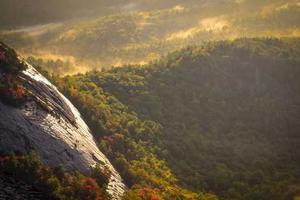

In [7]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [10]:
multi_modal_message = MultiModalMessage(content = ['What is in the image',img],source='User')

In [9]:
result = await my_Assistant.run(task=multi_modal_message)
result


TaskResult(messages=[MultiModalMessage(id='eef4c7d7-716c-444a-ad74-5cc0696e6296', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 24, 32, 426336, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x1171f5550>], type='MultiModalMessage'), TextMessage(id='530cd3a7-d74a-43cf-87ef-8ac395683b38', source='my_assistant', models_usage=RequestUsage(prompt_tokens=375, completion_tokens=66), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 27, 9, 215920, tzinfo=datetime.timezone.utc), content='The image shows a scenic landscape with a forested area and a rocky slope. It appears to be taken during sunset or sunrise, as the lighting casts a warm, golden hue over the scene. The forest is dense, and the trees exhibit various colors, indicating the possibility of autumn foliage. The overall atmosphere is serene and picturesque.', type='TextMessage')], stop_reason=None)

In [11]:
from pydantic import BaseModel


In [12]:
class PlanetInfo(BaseModel):
    name:str
    color:str
    distance:str

In [13]:
structured_model_client = OpenAIChatCompletionClient(
    model='gpt-4o',
    api_key=api_key,
    response_format=PlanetInfo
)


my_assistant_2 = AssistantAgent(name='Assistant2',model_client=structured_model_client)

In [14]:
result = await my_assistant_2.run(task='Who are you')
print(result)

messages=[TextMessage(id='d4351c19-da75-4a5a-b93e-49e489049bf6', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 28, 6, 830898, tzinfo=datetime.timezone.utc), content='Who are you', type='TextMessage'), TextMessage(id='f3bd8101-416b-47c5-b4ab-8350fc42116a', source='Assistant2', models_usage=RequestUsage(prompt_tokens=96, completion_tokens=26), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 28, 7, 733515, tzinfo=datetime.timezone.utc), content='{"name":"Earth","color":"Blue and Green","distance":"Average distance from the Sun is 149.6 million km"}', type='TextMessage')] stop_reason=None


##### messages=[TextMessage(id='d4351c19-da75-4a5a-b93e-49e489049bf6', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 28, 6, 830898, tzinfo=datetime.timezone.utc), content='Who are you', type='TextMessage'), TextMessage(id='f3bd8101-416b-47c5-b4ab-8350fc42116a', source='Assistant2', models_usage=RequestUsage(prompt_tokens=96, completion_tokens=26), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 28, 7, 733515, tzinfo=datetime.timezone.utc), 
##### content='{"name":"Earth","color":"Blue and Green","distance":"Average distance from the Sun is 149.6 million km"}', type='TextMessage')] stop_reason=None